In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x:iris.target_names[x])

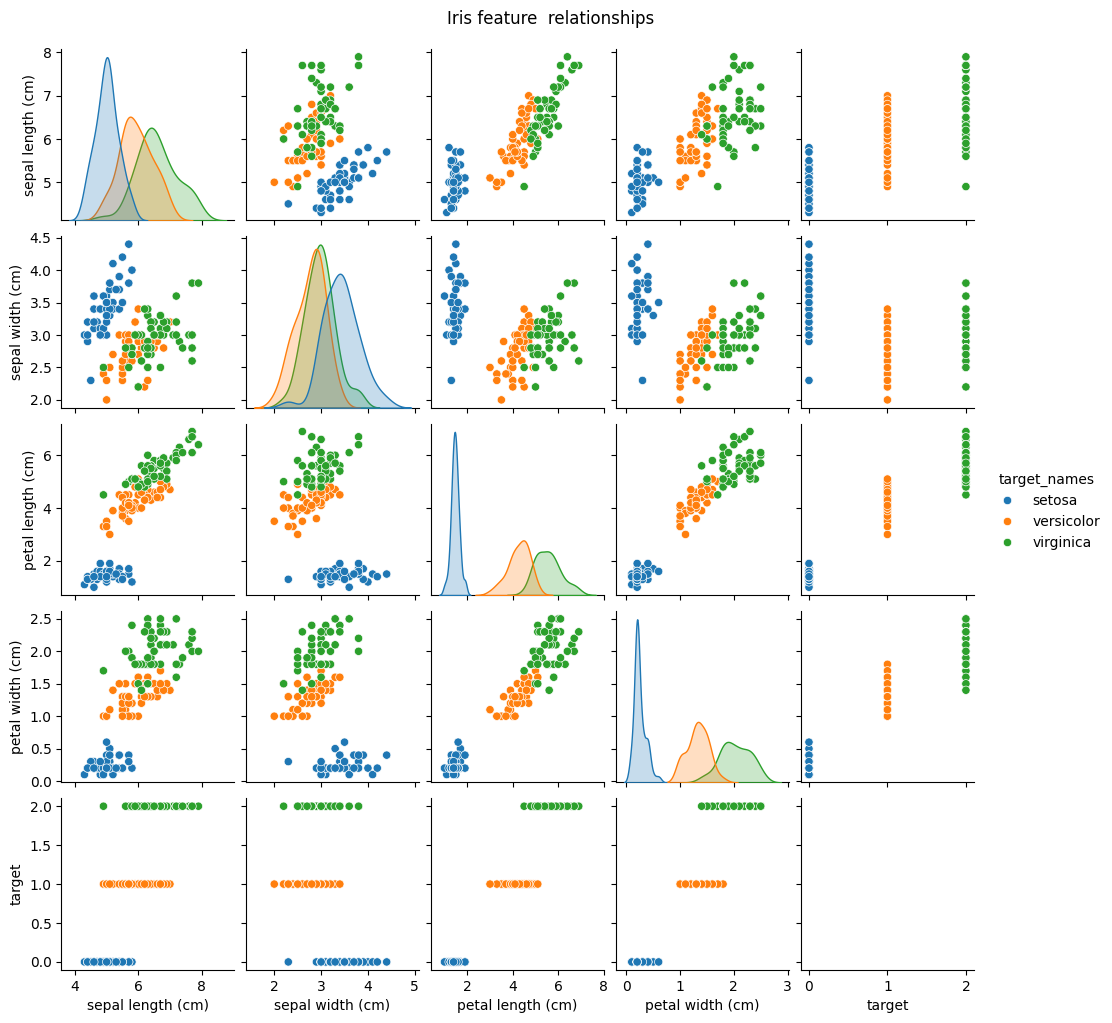

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='target_names',height= 2)
plt.suptitle("Iris feature  relationships", y=1.02)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training test shape", X_train.shape)
print("Testing test shape", X_test.shape)

Training test shape (120, 4)
Testing test shape (30, 4)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter =200)
model.fit(X_train, y_train)
training_accuracy = model.score(X_train,y_train)
print(f"Training accuracy = {training_accuracy: .2f}")

Training accuracy =  0.97


Testing accuracy =  1.00

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix')

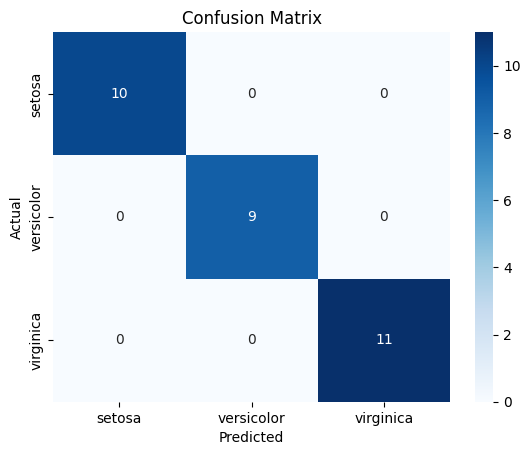

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing accuracy = {test_accuracy: .2f}")

print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names = iris.target_names))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

